## 회귀분석
- 회귀 분석과 오차의 성질

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import random
import pandas as pd
import seaborn as sb

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import platform 

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/kd/rnn/naver_movie' # Colab

plt.rcParams["font.size"] = 10          # 글자 크기
plt.rcParams["figure.figsize"] = (5, 3) # 인치단위 그래프 크기
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline

### 공부시간 대비 성적의 예측

In [8]:
X = [i for i in range(6)] # 0 ~ 5: 공부 시간
print(X)

[0, 1, 2, 3, 4, 5]


In [9]:
a = 2  # 기울기
b = 20 # 편향
Y = [(a * x) + b for x in X]
print(Y)
# 0 시간 공부하면 20점을 취득 할 수 있다.
# 1 시간 공부하면 22점을 취득 할 수 있다.
# 2 시간 공부하면 24점을 취득 할 수 있다.
# 3 시간 공부하면 26점을 취득 할 수 있다.
# 4 시간 공부하면 28점을 취득 할 수 있다.
# 5 시간 공부하면 30점을 취득 할 수 있다.

[20, 22, 24, 26, 28, 30]


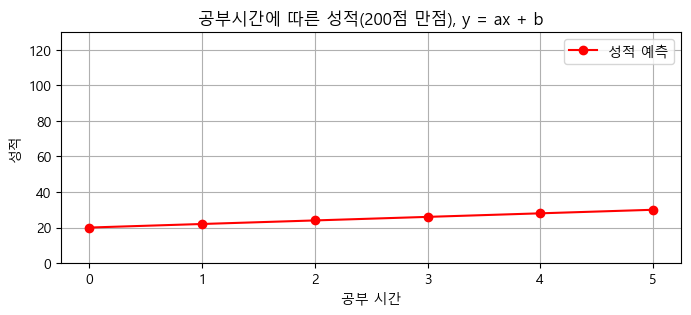

In [10]:
plt.figure(figsize=(8, 3)) # 단위: 인치
# X 공부 시간, Y: 실제 취득 성적
plt.plot(X, Y, color='red', linestyle='solid', marker='o', label='성적 예측')
plt.ylim(0, 130) # y limit: 범위
plt.grid(True) # 격자 출력
plt.title('공부시간에 따른 성적(200점 만점), y = ax + b')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.show()
# a에 어떤수를 지정하는가에 따라 공부시간당 성적이 변경됨.
# b: y 절편, 편향, Bias, 곱하기의 성질상 x가 0이면 무조건 0이되는 문제 해결

In [12]:
# a(기울기, y의 변화량/x의 변화량)의 특징 분석
# y = ax + b
Y1 = [(5 * x) + 20 for x in X]  # f(x) = 5x + 20
Y2 = [(10 * x) + 20 for x in X] # f(x) = 10x + 20
Y3 = [(20 * x) + 20 for x in X] # f(x) = 20x + 20
print('Y1:', Y1) # 0 *  5 + 20 = 20, 1 * 5 + 20 = 25
print('Y2:', Y2) # 0 * 10 + 20 = 20, 1 * 10 + 20 = 30
print('Y3:', Y3) # 0 * 20 + 20 = 20, 1 * 20 + 20 = 40

Y1: [20, 25, 30, 35, 40, 45]
Y2: [20, 30, 40, 50, 60, 70]
Y3: [20, 40, 60, 80, 100, 120]


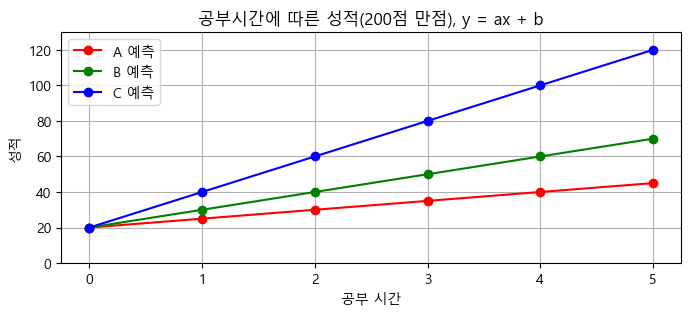

In [13]:
plt.figure(figsize=(8, 3)) # 단위: 인치
# X 공부 시간, Y: 실제 취득 성적
plt.plot(X, Y1, color='red', linestyle='solid', marker='o', label='A 예측')
plt.plot(X, Y2, color='green', linestyle='solid', marker='o', label='B 예측')
plt.plot(X, Y3, color='blue', linestyle='solid', marker='o', label='C 예측')
plt.ylim(0, 130) # y limit: 범위
plt.grid(True) # 격자 출력
plt.title('공부시간에 따른 성적(200점 만점), y = ax + b')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.show()
# a에 어떤수를 지정하는가에 따라 공부시간당 성적이 변경됨.
# b: y 절편, 편향, Bias, 곱하기의 성질상 x가 0이면 무조건 0이되는 문제 해결

- 독립변수는 정하기 나름
- 예를들어 공부시간은 집중도, 온라인강의, 성실도 등등 세분화한다던가.. 이러면 한 독립변수 당 한차원 늘어난 방정식임.
- 따라서 위는 1차방정식 늘어나면 2차 등으로 늘어남.